# Problem

Our main purpose is to predict whether the passengers survived or dead. Since our expected values are binary it is a **Binary Classification**.

# Importing Necesarry Libraries

In [1]:
import pandas as pd # data reading and data manipulations

import matplotlib.pyplot as plt # for data visulation operations
%matplotlib inline 
# for can able to see plots

import seaborn as sns # for data visulation

import numpy as np # numerical operations

import warnings # for ignore unimportant warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

import re # this library for regex

import graphviz # for visulation graph
#Algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

#for scaling data
from sklearn.preprocessing import MinMaxScaler
#for hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


***Firstly we are looking at our data for understanding what it is.***

I will look at the train and test datasets one by one, then I will merge both train and test because I want to see my preprocessing operations both on test and train datasets. After I finish my preprocessing I will separate these two datasets

# ***Reading Data***

- Reading train data
- Reading test data
- Concating two dataset


## ***Reading train data***

In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")

## ***Brief EDA***

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## ***Reading test data***

In [7]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")

## ***Brief EDA***

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.shape

(418, 11)

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## ***Concating two dataset***

I am merging these two datasets because I want to do the same preprocessing for both of them.

In [12]:
df=train.append(test)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


We have done this by concating but the indexes did not change. As a consequence, I will reset indexes.

In [13]:
df.reset_index(drop=True,inplace=True)
# drop=True means drop old index column
# inplace=True means keep changes on main df
#instead of inplace=True, I could use df=df.reset_index(drop=True)

# ***EDA***

In [14]:
df.shape

(1309, 12)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [18]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# **Examining missing values**

- **Survived column**: the missing values come from test dataset, our main purpose is predicting these missing values
    - Our main purpose to fill these missing values.
- **Age column**: the missing values are 263. That means almost 20 percentage of our data. We can not drop it so we should find a good way to deal with.
    - I should find a good method to fill inside of it.
- **Fare column**: there is only one missing value so we can easly change the missing value by the mean of the column by considering features of Passenger.
    - I will fill by mean of the column by considering features of Passenger
- **Cabin column**: missing values are almost the 80 percentage of the data, thus; we can not fill inside of it, if we do it could give us a bad result.
    - I will just drop this column after the feature enginering.
- **Embarked column**: this column is a object type column, therefore; 
    - I will just fill by mode of the column.

## **Age Column**

### *Feature Engineering*

In [19]:
df[["Name"]].sample(20)

,Name
737,"Lesurer, Mr. Gustave J"
919,"Brady, Mr. John Bertram"
127,"Madsen, Mr. Fridtjof Arne"
404,"Oreskovic, Miss. Marija"
463,"Milling, Mr. Jacob Christian"
724,"Chambers, Mr. Norman Campbell"
119,"Andersson, Miss. Ellis Anna Maria"
688,"Fischer, Mr. Eberhard Thelander"
513,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)"
168,"Baumann, Mr. John D"


> I figure out that all names has a Title and all Title are finishing by dot(.). Titles can helps us to estimate ages because in general case title are proper for certain age interal.

In [20]:
pattern = r"\S+(?=\.)"

#\S+: This matches one or more characters that are not spaces. The word preceding the dot is matched.
#(?=\.): We want to stop matching before the dot, thus it's necessary.

df["Title"]=[re.findall(pattern, name)[0] for name in df["Name"]]
# I used list comprehension, it is basicly take elements from Name column one by one and finding the word before the dot.

print(df["Title"].unique()) #Let see what we extracted

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


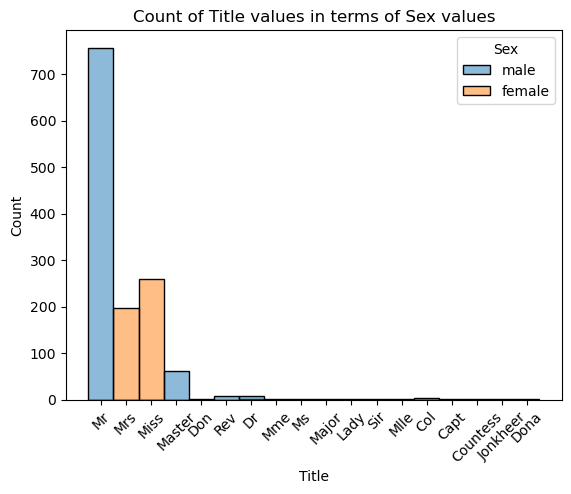

In [21]:
sns.histplot(data=df, x="Title",hue="Sex")
# histplot creates a histogram, putting "Title" values on x axis 
plt.ylabel("Count")
plt.title("Count of Title values in terms of Sex values")
plt.xticks(rotation=45);
# rotating x labels for 45 degrees

## Definitons
1. **Mr**: any man
2. **Mrs**: married woman who uses her husband's last name
3. **Miss**: unmarried woman
4. **Ms**: married or unmarried woman (common in business)
5. **Master**: minor male
6. **Don**: male that around 40s
7. **Dona**: female that around 40s
8. **Sir**: adult male of any age
9. **Lady**: adult female of any age
10. **Dr**: Doctor 
11. **Rev**: Reverend
12. **Mme**: Madame
13. **Mlle**: Mademoiselle 
14. **Major**: Rank in the Military
15. **Col**: Colonel
16. **Capt**: Captain
17. **Countess**: Wife of a Count
18. **Jonkheer**: a rank for nobility

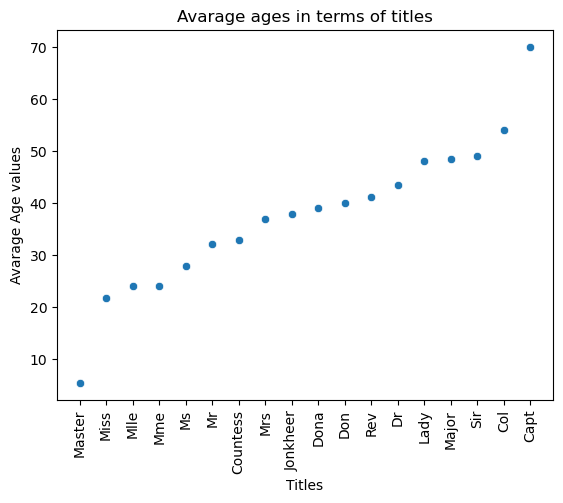

In [22]:
titles=df.groupby("Title")["Age"].mean().sort_values().keys().tolist()
# taking title names
ages=df.groupby("Title")["Age"].mean().sort_values().values.tolist()
# taking avarage ages
plt.figure()
sns.scatterplot(x=titles,y=ages)
#scatterplot creates a scatter plot,title names to x axis,avarage ages to y axis
plt.xticks(rotation=90)
plt.xlabel("Titles")
plt.ylabel("Avarage Age values")
#rotating x labels for 90 degrees
plt.title("Avarage ages in terms of titles");

In [23]:
old_miss=df.loc[df["Age"].isnull()]
tempage=df["Age"].copy()
tempsex=df["Sex"].copy()
# I will keep titles data of missing values on age column for use it later.

In [24]:
df['Age'].fillna(df.groupby("Title")["Age"].transform("mean"),inplace=True)
# filling missing values by their means in terms of their titles.

<Figure size 3000x1000 with 0 Axes>

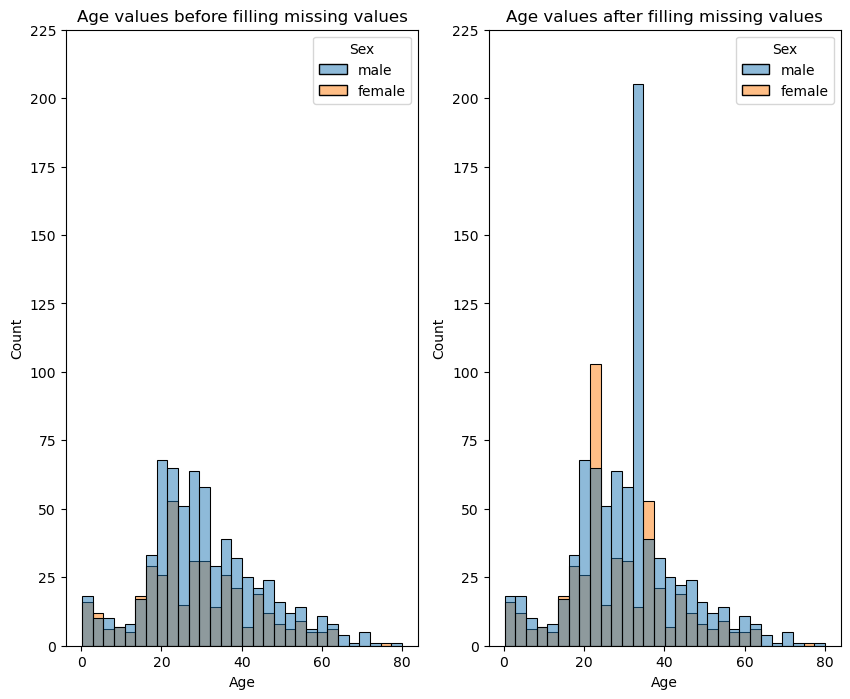

In [25]:
fig=plt.figure(figsize=(30,10))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.histplot(x=tempage, hue=tempsex, ax=axs[0],bins=30)
axs[0].set_title("Age values before filling missing values")
axs[0].set_ylim([0,225])

# Create a box plot on the second subplot
sns.histplot(x="Age",hue="Sex" ,data=df, ax=axs[1],bins=30)
axs[1].set_title("Age values after filling missing values")
axs[1].set_ylim([0,225])

# Show the plot
plt.show();

Why these females and males are increasing so much?

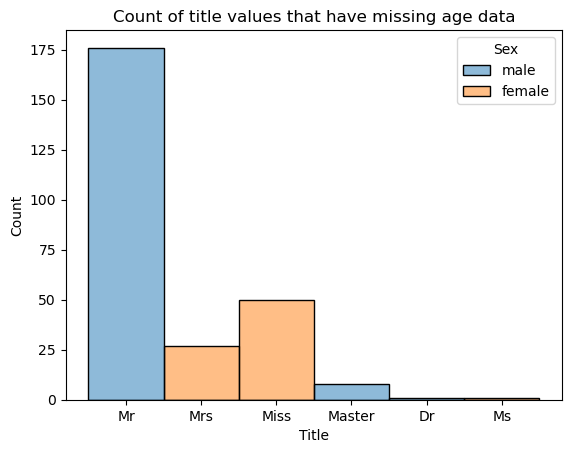

In [26]:
plt.figure()
sns.histplot(data=old_miss ,x="Title",hue="Sex")
plt.title("Count of title values that have missing age data");

As you can see there is a lot of **Mr** and **Miss** value on values which we fill, due to these people there is huge diffrences between old and new Age Column


## **Fare Columm**

Lets look at the null value!

In [27]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


Mr. Thomas's fare information is missing. I will fill this info by looking **Pclass**, **Sex** and **Age** column.  

In [28]:
#I will save Age datas because I will round numbers to compare easly
ages=df["Age"]

In [29]:
df["Age"]=df["Age"].apply(lambda x: round(x/10)*10)
#apply function helps to apply inside of it
#lambda function is a built-in function and it is a temporary function. we use it when we will use a function just for once.
#lambda function takes all data one by one and it is dividing by ten. After then rounding the number, then multiplying by 10 again.

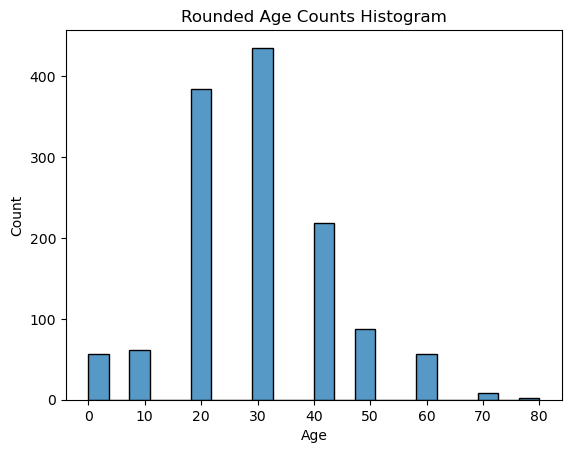

In [30]:
#You can see counts of the new values of the Age column:
sns.histplot(data=df,x="Age");
plt.title("Rounded Age Counts Histogram");

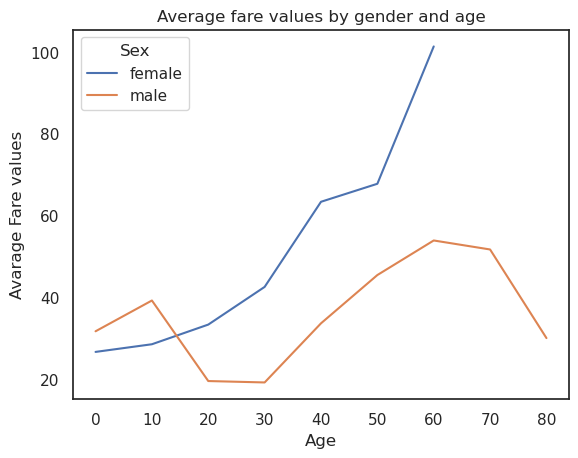

In [31]:
sns.set(style="white")
df.pivot_table("Fare",index=["Age"],columns=["Sex"]).plot()
plt.ylabel("Avarage Fare values")
plt.title("Average fare values by gender and age");

> We see that female fares are going up since males price can sometimes decrease.

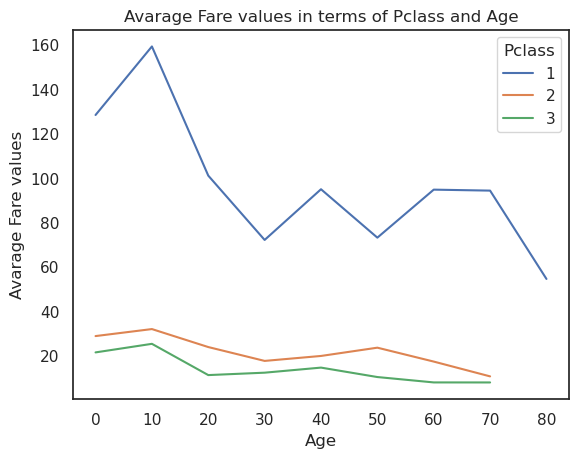

In [32]:
sns.set(style="white")
df.pivot_table("Fare",index=["Age"],columns=["Pclass"]).plot()
plt.ylabel("Avarage Fare values")
plt.title("Avarage Fare values in terms of Pclass and Age");

> By looking to graph, we can easly see the diffrences between Pclasses and also Ages.

In [33]:
tomsfare=df.groupby(["Pclass","Sex","Age"])["Fare"].mean()[3,"male",60]
print("Avarage Fare of a male from pclass 3 and around 60th is : "+str(tomsfare))
df["Fare"].fillna(tomsfare,inplace=True)

Avarage Fare of a male from pclass 3 and around 60th is : 7.321875


In [34]:
df["Age"]=ages
#Changing Age Column with original column

## **Cabin Column**

In [35]:
df.loc[df["Cabin"].notnull(),"Cabin"].sample(20)

438     C23 C25 C27
710             C90
950             B61
1222            A18
110            C110
1093        C62 C64
1255            E50
879             C50
730              B5
1037            E46
310             C54
251              G6
174              A7
820             B69
815            B102
1075        B58 B60
337             E40
925             C78
627              D9
919             A21
Name: Cabin, dtype: object

I can see that there are letters in Cabin column.This letter probably shows the desks

In [36]:
df.loc[df["Cabin"].notnull(),"Deck_letter"]=[i.split(" ")[0][0] for i in df.loc[df["Cabin"].notnull(),"Cabin"].tolist()]
# I extracted letters from Cabin column

I will fill Nan values after the visulation because of the Number of missing values too high and I do not want to lose efficeny of my visulation.

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck_letter, dtype: int64


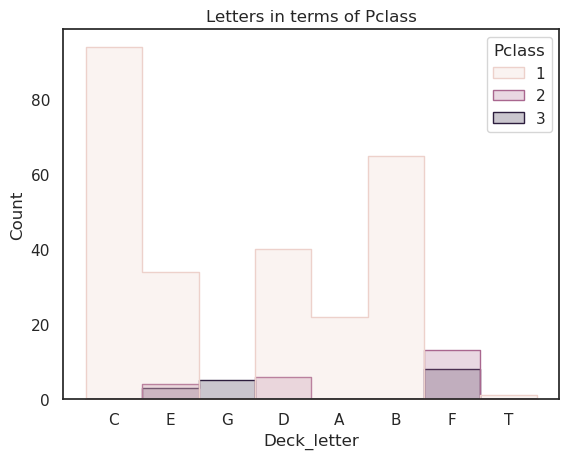

In [37]:
print(df["Deck_letter"].value_counts())
sns.histplot(data=df,x="Deck_letter",hue="Pclass",element="step")
plt.title("Letters in terms of Pclass");

The graph shows us that there are 3rd class Passengers in E, F and G as A, B and C are full of first class Passengers. So it is clear that Letters and Pclass have a high correlation.

I also see that there is only one T value and that value is first class passenger. I will add the T value to the C values to reduce the features.

In [38]:
df.loc[df["Deck_letter"]=="T"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck_letter
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,T


In [39]:
df["Deck_letter"].replace("T","C",inplace=True)

Let's look at the disturibution in terms of Survived Column 

I want to look at this in terms of test and train Data to understand more clear.

<Figure size 3000x1000 with 0 Axes>

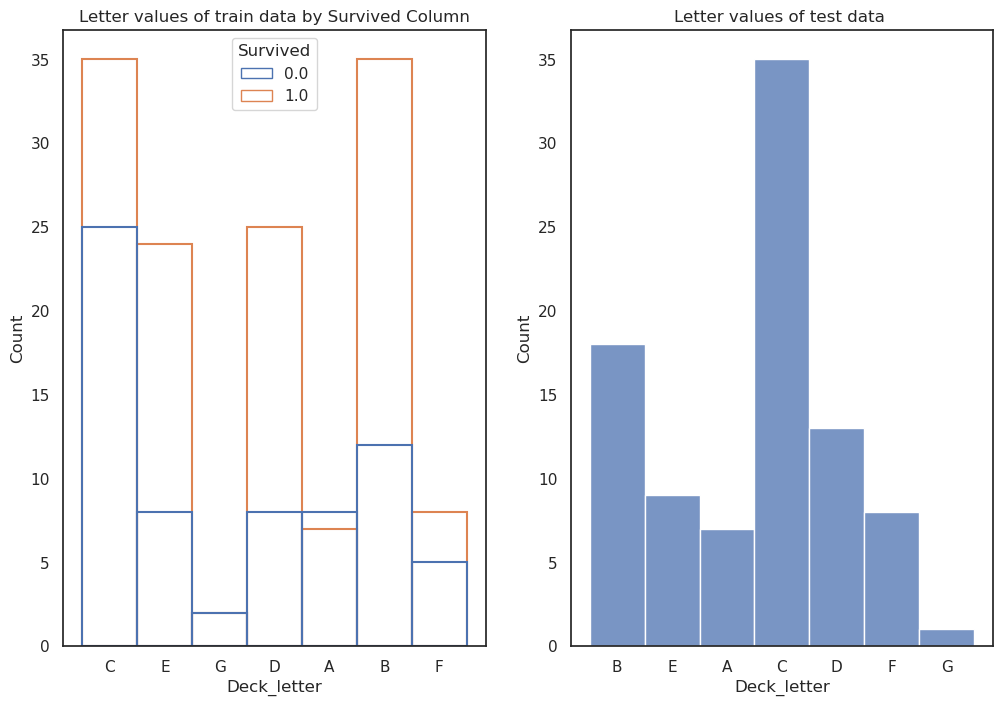

In [40]:
fig=plt.figure(figsize=(30,10))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.histplot(data=df.iloc[:891,],x="Deck_letter", hue="Survived",fill=False, ax=axs[0],bins=30)
axs[0].set_title("Letter values of train data by Survived Column")

# Create a box plot on the second subplot
sns.histplot(x="Deck_letter" ,data=df.iloc[891:,], ax=axs[1],bins=30)
axs[1].set_title("Letter values of test data ")

# Show the plot
plt.show();

All G Passengers died. It is probably that it has hierarchical system. I mean that A Passengers are more rich than others so the best locations on the ship are own by A Passengers.

G Passengers has the worst place in ship so they probably could not run from being drowned.

---

## Filling missing values

In [41]:
df["Deck_letter"].fillna("U",inplace=True)
#"U" if it is Unknown

---


I will drop "Cabin" column I taked important points from it.

In [42]:
df.drop("Cabin",axis=1,inplace=True)

**Let's look at our data without Cabin column**

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck_letter
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,U


## **Embarked column**

S    914
C    270
Q    123
Name: Embarked, dtype: int64


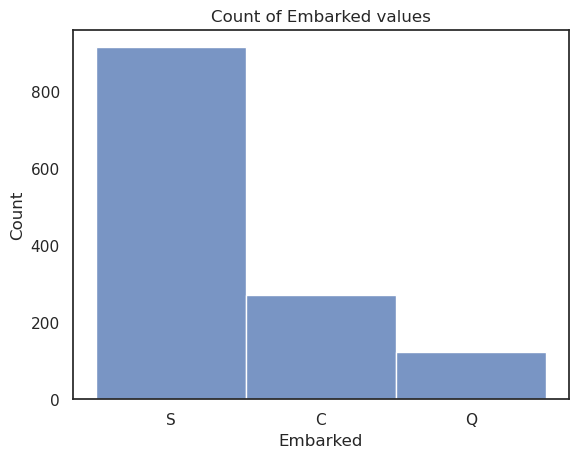

In [44]:
print(df["Embarked"].value_counts())
sns.histplot(data=df,x="Embarked")
plt.title("Count of Embarked values");

**This information given by competition:**   

*embarked ----> Port of Embarkation      ------------->   C = Cherbourg, Q = Queenstown, S = Southampton*


As we can see, "**S**" is the mode of the column, therefore; I will fill missing values by "**S**"


In [45]:
df["Embarked"].fillna("S",inplace=True)

In [46]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Deck_letter      0
dtype: int64

## Ticket column

I was hoping to use all information given by the dataset. Therefore, I created the TicketNum column containing the last number of ticket values. And by removing the punctuation, I created the TicketLet column with the remaining values. However, after creating new features, my column number increased to 53 and my accuracy decreased. As a consequence, I decided to drop the Ticket column. 


> **In this part I just show what did I try with Ticket column**

In [47]:
#df["TicketNUM"]=[int(i.split()[-1]) if i.split()[-1].isdigit() else 0 for i in df["Ticket"]]
#print("Number of unique values TicketNUM columns\t"+str(df["TicketNUM"].nunique()))
#df[["TicketNUM"]].sample(10)

In [48]:
#df["TicketLET"]=["Unknown" if len(i.split())==1 else "_".join(i.split()[:-1]).replace("/","").replace(".","").replace("_","") for i in df["Ticket"]]
#print("Number of unique values TicketLET columns\t"+str(df["TicketLET"].nunique()))
#df[["TicketLET"]].sample(10)

Let's look at data!

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck_letter
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,U


**Dataset is ready to use lets explore it a bit more**

In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.896894,0.498854,0.385027,33.275637
std,378.020061,0.486592,0.837836,13.193803,1.041658,0.865560,51.743859
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.774238,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [51]:
df.describe(include="O").T
# it is looking only object columns
#.T takes the transpose of it

,count,unique,top,freq
Name,1309,1307,"Connolly, Miss. Kate",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Embarked,1309,3,S,916
Title,1309,18,Mr,757
Deck_letter,1309,8,U,1014


Why are there same names?


I want to look at that.

In [52]:
df[df["Name"]=="Connolly, Miss. Kate"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck_letter
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,Q,Miss,U
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,Miss,U


Same name but diffrent person! Interesting!


---

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck_letter
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,U


I will not use **Ticket** column, because when I used it, my accuracy decreased. Hence, I will just drop this column.


I think "**Name**","**Title**" and "**PassengerId**" has no effect on "**Survived**" column so I will just drop it.

In [54]:
df_less_fea=df.drop(["Name","Title","PassengerId","Ticket"],axis=1,inplace=True)

#### Let's look at our data

In [55]:
df.sample(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_letter
810,0.0,3,male,26.000000,0,0,7.8875,S,U
276,0.0,3,female,45.000000,0,0,7.7500,S,U
46,0.0,3,male,32.252151,1,0,15.5000,Q,U
774,1.0,2,female,54.000000,1,3,23.0000,S,U
602,0.0,1,male,32.252151,0,0,42.4000,S,U
1033,NaN,1,male,61.000000,1,3,262.3750,C,B
233,1.0,3,female,5.000000,4,2,31.3875,S,U
603,0.0,3,male,44.000000,0,0,8.0500,S,U
373,0.0,1,male,22.000000,0,0,135.6333,C,U
753,0.0,3,male,23.000000,0,0,7.8958,S,U


### *Feature Engineering*

let's say you are on the Titanic and you are alone, it will be easier for you to survive, however; If you have a family that you are responsible for and your family has a large number of individuals. it may try to save your family's life before your own, thereby reducing your chances of survival.


For that reason I will open a new column that is **NumFamily**.

In [56]:
df['NumFamily']=df['SibSp']+df['Parch']+1 # last "1" is the person themself
df.NumFamily.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: NumFamily, dtype: int64

In [57]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_letter,NumFamily
448,1.0,3,female,5.000000,2,1,19.2583,C,U,4
122,0.0,2,male,32.500000,1,0,30.0708,C,U,2
917,NaN,1,female,22.000000,0,1,61.9792,C,B,2
155,0.0,1,male,51.000000,0,1,61.3792,C,U,2
976,NaN,3,male,32.252151,1,0,14.4542,C,U,2
185,0.0,1,male,32.252151,0,0,50.0000,S,A,1
503,0.0,3,female,37.000000,0,0,9.5875,S,U,1
97,1.0,1,male,23.000000,0,1,63.3583,C,D,2
937,NaN,1,male,45.000000,0,0,29.7000,C,A,1
540,1.0,1,female,36.000000,0,2,71.0000,S,B,3


Let's look at Correlation between "**Survived**" column and others

Survived     1.000000
Pclass       0.338481
Fare         0.257307
Age          0.087092
Parch        0.081629
SibSp        0.035322
NumFamily    0.016639
Name: Survived, dtype: float64


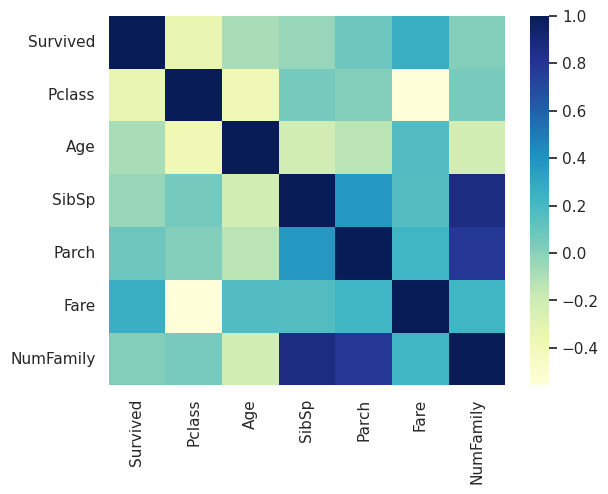

In [58]:
print(abs(df.corr()["Survived"]).sort_values(ascending=False))
sns.heatmap(df.corr(),cmap="YlGnBu");

**Pclass** and **Fare** columns has high corelation than others and I think, it is about location of the Passenger. Probably rich people ( A, B, and C letters) are more near to lifeboats than poor people ( G, F,and E).

In [59]:
df.shape

(1309, 10)

In [60]:
df=pd.get_dummies(df,drop_first=True)

In [61]:
print("df shape: "+str(df.shape))

df shape: (1309, 17)


In [62]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NumFamily,Sex_male,Embarked_Q,Embarked_S,Deck_letter_B,Deck_letter_C,Deck_letter_D,Deck_letter_E,Deck_letter_F,Deck_letter_G,Deck_letter_U
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,0,0,0,0,0,1
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,1,0,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,1,0,0,0,0,0
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,0,0,0,0,0,1


Survived         1.000000
Sex_male         0.543351
Pclass           0.338481
Deck_letter_U    0.316912
Fare             0.257307
Deck_letter_B    0.175095
Deck_letter_D    0.150716
Embarked_S       0.149683
Deck_letter_E    0.145321
Deck_letter_C    0.110226
Age              0.087092
Parch            0.081629
Deck_letter_F    0.057935
SibSp            0.035322
NumFamily        0.016639
Deck_letter_G    0.016040
Embarked_Q       0.003650
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Correlation map after dummy variables')

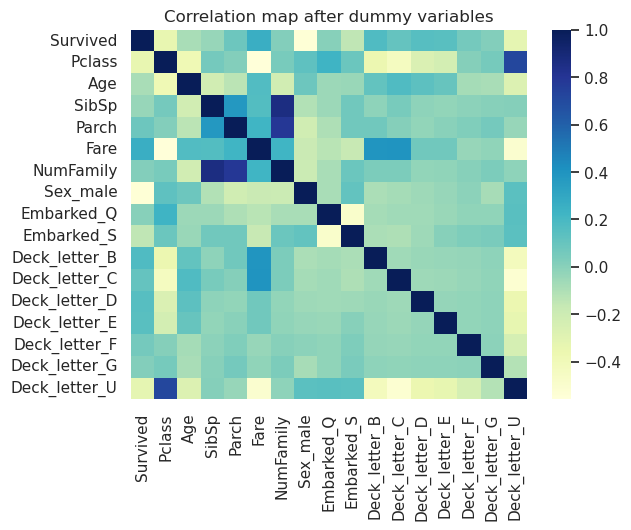

In [63]:
print(abs(df.corr()["Survived"]).sort_values(ascending=False))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation map after dummy variables")

# Fit and Predict

First I will seperate my df to train and test again.

In [64]:
train=df.loc[df["Survived"].notnull(),:]
test=df.loc[df["Survived"].isnull(),:]

Train Survived column will be our y_train

In [65]:
y_train=train["Survived"]

Train data without Survived column will be our x_train

In [66]:
X_train=train.drop("Survived",axis=1)

Test data is our x_test and we want to predicct y_test (Test Survived column) .

In [67]:
X_test=test.drop("Survived",axis=1)

Let's look at shapes

In [68]:
y_train.shape,X_train.shape,X_test.shape

((891,), (891, 16), (418, 16))

Lets look at the data

In [69]:
print("X Train")
X_train.head()

X Train


,Pclass,Age,SibSp,Parch,Fare,NumFamily,Sex_male,Embarked_Q,Embarked_S,Deck_letter_B,Deck_letter_C,Deck_letter_D,Deck_letter_E,Deck_letter_F,Deck_letter_G,Deck_letter_U
0,3,22.0,1,0,7.2500,2,1,0,1,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,2,0,0,0,0,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,2,0,0,1,0,1,0,0,0,0,0
4,3,35.0,0,0,8.0500,1,1,0,1,0,0,0,0,0,0,1


In [70]:
print("X Test")
X_test.head()

X Test


,Pclass,Age,SibSp,Parch,Fare,NumFamily,Sex_male,Embarked_Q,Embarked_S,Deck_letter_B,Deck_letter_C,Deck_letter_D,Deck_letter_E,Deck_letter_F,Deck_letter_G,Deck_letter_U
891,3,34.5,0,0,7.8292,1,1,1,0,0,0,0,0,0,0,1
892,3,47.0,1,0,7.0000,2,0,0,1,0,0,0,0,0,0,1
893,2,62.0,0,0,9.6875,1,1,1,0,0,0,0,0,0,0,1
894,3,27.0,0,0,8.6625,1,1,0,1,0,0,0,0,0,0,1
895,3,22.0,1,1,12.2875,3,0,0,1,0,0,0,0,0,0,1


In [71]:
print("Y Train")
y_train.head()

Y Train


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

I will also scale my x variables because it may increase my performance at LogisticRegression and Supported Vector Machine.

For scaling it would be better that scaling data without seperated parts, because I will use MinMaxScaler from sklearn and maximum and minumum values will be diffrent , if I seperate the data. 

In [72]:
scale=MinMaxScaler()

col=df.columns
#I taked columns names
df_scaled = scale.fit_transform(df)
#scaled df but it is numpy.ndarray now

df_sca= pd.DataFrame(df_scaled,columns=col)
#I converted to dataframe from numpy.ndarray

print("New df")
df_sca.head()

New df


,Survived,Pclass,Age,SibSp,Parch,Fare,NumFamily,Sex_male,Embarked_Q,Embarked_S,Deck_letter_B,Deck_letter_C,Deck_letter_D,Deck_letter_E,Deck_letter_F,Deck_letter_G,Deck_letter_U
0,0.0,1.0,0.273456,0.125,0.0,0.014151,0.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.473882,0.125,0.0,0.139136,0.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.323563,0.000,0.0,0.015469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.436302,0.125,0.0,0.103644,0.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.436302,0.000,0.0,0.015713,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Seperating the scaled data

In [73]:
train_sca=df.loc[df_sca["Survived"].notnull(),:]
test_sca=df.loc[df_sca["Survived"].isnull(),:]
y_train_sca=train_sca["Survived"]
X_train_sca=train_sca.drop("Survived",axis=1)
X_test_sca=test_sca.drop("Survived",axis=1)

---

I will use submission file template of Kaggle for my submission template.

In [74]:
sub=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


---

## Important Note

I do not suggest using a Automated Hyperparameter tuning. It will produce a overfitting ,because I do not use cross-validation. I am also against to use cross validation because in this case we have small data size and cross validation will be result as losing some features.

However I will use best estimator from GridSearchCV as a guide. 

Let's go to **Predicting**

I used RandomForest , Decision Trees, Logistic regression, and SVM. Since all iteration of myself could increase the line of codes and could be boring, I tried all myself and changed if it needs. I share with you with the results

# Random Forest

In [75]:
"""model = RandomForestClassifier(random_state=42,)
n_estimators = [10,30,50,75,100,150,200,250,300]
max_features = ['sqrt'] # "sqrt is in default so I didn't add"
criterion=["gini", "entropy"]
max_depth=[3,4,5,6,7,8]
min_impurity_decrease=[0,0.1,0.2,0.3,0.4,0.5]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion,max_depth=max_depth,min_impurity_decrease=min_impurity_decrease)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""
    

#It was to slow so I added code to comments

'model = RandomForestClassifier(random_state=42,)\nn_estimators = [10,30,50,75,100,150,200,250,300]\nmax_features = [\'sqrt\'] # "sqrt is in default so I didn\'t add"\ncriterion=["gini", "entropy"]\nmax_depth=[3,4,5,6,7,8]\nmin_impurity_decrease=[0,0.1,0.2,0.3,0.4,0.5]\n# define grid search\ngrid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion,max_depth=max_depth,min_impurity_decrease=min_impurity_decrease)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X_train, y_train)\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

Acording to that table it abvious that min_impurity_decrease should be 0,

max_depth is 8, I think could be overfit the data 

criterion is "gini" possible but "entrophy" is also usefull.

In [76]:
"""print("Best hyperparameters: ", grid_result.best_params_)"""

'print("Best hyperparameters: ", grid_result.best_params_)'

Lets try it!

In [77]:
#ran=RandomForestClassifier(criterion="gini",max_depth= 8,n_estimators= 30,random_state=42)

## I think we should decrease max_depth and I will use entropy instead of gini, and I will increase n_estimators
## first I will try same parameters to entrophy adn see the result

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 8,n_estimators= 30,random_state=42)

## same result came 
## I will decrease max_depth to 5.

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 5,n_estimators= 30,random_state=42)

## Acuracy Increased, I will decrease max_depth to 4 since some trees could be overfit

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 30,random_state=42)

## As I think, accuracy increased. What about max_depth=3 ?

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 3,n_estimators= 30,random_state=42)

##Accuracy decreased, I will use max_depth=4 anymore. I think if I increase the n_estimators acrucay will increase too.

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 50,random_state=42)

## Accuracy increased,I will contunie to increase n_estimattors until acuracy starts to decrease

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 75,random_state=42)

## acuracy decreased,I will decrease N_estimators.


#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 60,random_state=42)

##Accuracy Increased, I will give 65 to n_estimators

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 65,random_state=42)

##Accuracy Decreased, I will try 62

#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 62,random_state=42)
#Same accuracy with 60, I will try 63
#ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 63,random_state=42)

##acuracy decreased, So 61 could be local maxımum

##ran=RandomForestClassifier(max_features="sqrt",criterion="entropy",max_depth= 4,n_estimators= 61,random_state=42)

##it didnt increase
##so our best is 60

best_ran=RandomForestClassifier(random_state=42,criterion='entropy', max_depth= 4, max_features= 'sqrt', n_estimators= 200)

best_ran.fit(X_train, y_train)
y_pred = best_ran.predict(X_test)
sub["Survived"]= pd.DataFrame(y_pred).astype(int)
sub.to_csv("best_ran.csv",index=False)

**Feature Importance**

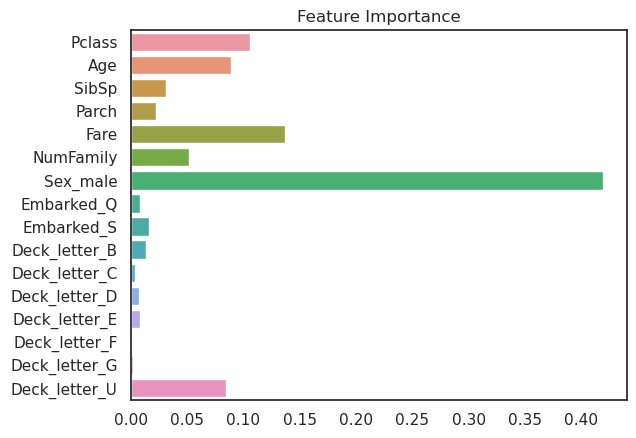

In [78]:
values = best_ran.feature_importances_
sns.barplot(y=X_train.columns, x=values).set(title='Feature Importance')
plt.show()

## RandomForest

> Gini max=8 est=30 , accuracy=0.77033

> Entr max=8 est=30 , accuracy=0.77033

> Entr max=5 est=30 , accuracy=0.77751

> Entr max=4 est=30 , accuracy=0.78229

> Entr max=3 est=30 , accuracy=0.7799

> Entr max=4 est=50 , accuracy=0.78468

> Entr max=4 est=75 , accuracy=0.78229

> Entr max=4 est=60 , accuracy=0.78708

> Entr max=4 est=65 , accuracy=0.78468

> Entr max=4 est=62 , accuracy=0.78708

> Entr max=4 est=63 , accuracy=0.78229

> Entr max=4 est=61 , accuracy=0.78468

> Entr max=4 est=500 , accuracy=0.78229

>**Entr max=4 est=200 , accuracy=0.79186**


I could find a local maximum but it is my best.

# Decision Tree

In [79]:
"""model=DecisionTreeClassifier(random_state=42)
criterion=["gini", "entropy"]
max_depth=[4,5,6,7,8,9,10]
min_samples_split=[2,5,10,15]
max_features=["sqrt"]
min_samples_leaf=[1,2,3,5]
max_leaf_nodes=[None,3,5,7,9]
# define grid search
grid = dict(criterion=criterion,min_samples_split=min_samples_split,max_features=max_features,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

#It was to slow so I added code to comments, I did not delete for showing that I tried GridSearchCV.

'model=DecisionTreeClassifier(random_state=42)\ncriterion=["gini", "entropy"]\nmax_depth=[4,5,6,7,8,9,10]\nmin_samples_split=[2,5,10,15]\nmax_features=["sqrt"]\nmin_samples_leaf=[1,2,3,5]\nmax_leaf_nodes=[None,3,5,7,9]\n# define grid search\ngrid = dict(criterion=criterion,min_samples_split=min_samples_split,max_features=max_features,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X_train, y_train)\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

In [80]:
"""print("Best hyperparameters: ", grid_result.best_params_)"""

'print("Best hyperparameters: ", grid_result.best_params_)'

In [81]:
#tree=DecisionTreeClassifier(random_state=42,max_leaf_nodes=None,criterion="entropy",min_samples_leaf=5,min_samples_split= 15,max_features="sqrt")
## This is the result from GridSearch but it is obvious that it will create a overfitting because of the max_leaf_nodes=None.
#the result is too bad. I will change parameters in logical way. max_leaf_node will be 10,min leaf 5, min split 20

#tree=DecisionTreeClassifier(random_state=42,max_leaf_nodes=10,criterion="entropy",min_samples_leaf=5,min_samples_split= 20,max_features="sqrt")
## Acuracy highly increased, I will play with leaf nodes

#tree=DecisionTreeClassifier(random_state=42,max_leaf_nodes=11,criterion="entropy",min_samples_leaf=5,min_samples_split= 20,max_features="sqrt")
##Accuracy is the same as preivious one

#tree=DecisionTreeClassifier(random_state=42,max_leaf_nodes=12,criterion="entropy",min_samples_leaf=5,min_samples_split= 10,max_features="sqrt")
##Accuracy decresed so we can say that caused overfitting


#tree=DecisionTreeClassifier(random_state=42,max_leaf_nodes=9,criterion="entropy",min_samples_leaf=5,min_samples_split= 20,max_features="sqrt")
## Accuracy decreased, so max_leaf_nodes is 10

best_tree=DecisionTreeClassifier(random_state=42,max_leaf_nodes=10,criterion="entropy",min_samples_leaf=5,min_samples_split= 20,max_features="sqrt")

best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
sub["Survived"]= pd.DataFrame(y_pred).astype(int)
sub.to_csv("best_tree.csv",index=False)

## Decision Tree

> max_leaf_nodes=None , entropy, min_sample_leaf=5, minsample_split= 15, score: 0.74401

> **max_leaf_nodes=10 , entropy, min_sample_leaf=5, minsample_split= 20, score: 0.78229**

> max_leaf_nodes=11 , entropy, min_sample_leaf=5, minsample_split= 20, score: 0.78229

> max_leaf_nodes=12 , entropy, min_sample_leaf=5, minsample_split= 20, score: 0.7727

> max_leaf_nodes=9 , entropy, min_sample_leaf=5, minsample_split= 20, score: 0.7799


## Plot the tree

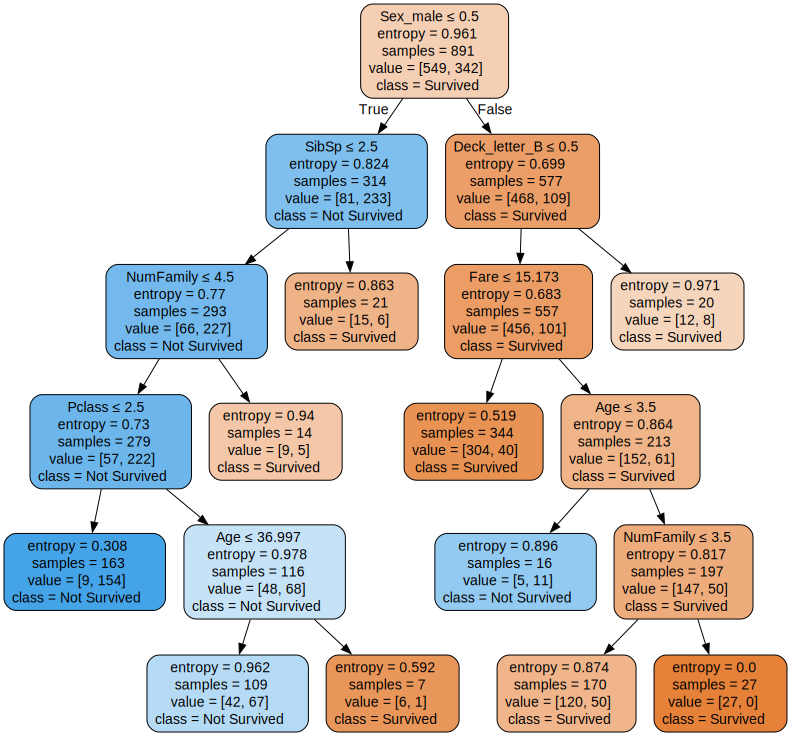

In [82]:
dot_data = export_graphviz(best_tree,   
                      out_file=None, 
                      feature_names=X_train.columns,       #Provide X Variables Column Names 
                      class_names=['Survived','Not Survived'],      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

# Save the graph as a PNG file
graph.render("my_tree_graph")

graph 

# Feature Importance

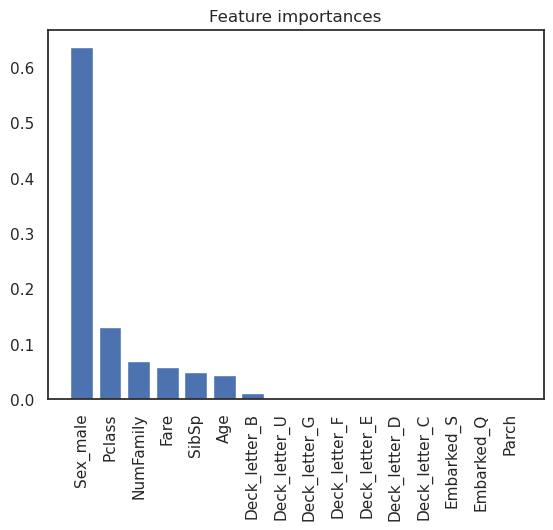

In [83]:
# Plot the feature importances
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

# Logistic Regresion

In [84]:
#log=LogisticRegression(C= 0.5, penalty='l2', solver= 'lbfgs',multi_class="ovr",max_iter=500)
##ovr means one vs rest

#log=LogisticRegression(C= 0.5, penalty='l2', solver= 'lbfgs',multi_class="multinomial",max_iter=500)
##multinomial is looking to probabilities
##Acuracy decreased, so I will contunie with ovr lets change the solver

#log=LogisticRegression(C= 0.5, penalty='l2', solver= 'liblinear',multi_class="ovr",max_iter=500)
##Accuracy increased, I will contunnie with liblinear

#log=LogisticRegression(C= 0.5, penalty='l1', solver= 'liblinear',multi_class="ovr",max_iter=500)
##Same accuracy, I will continue with penalty l2 . I will change C values

#log=LogisticRegression(C= 1, penalty='l2', solver= 'liblinear',multi_class="ovr",max_iter=500)
##Accuracy decreased, I will try less c values

#log=LogisticRegression(C= 0.1, penalty='l2', solver= 'liblinear',multi_class="ovr",max_iter=500)
##Accuracy decreased, I will use C as 0.5, Lets play with max_iter

#log=LogisticRegression(C= 0.5, penalty='l2', solver= 'liblinear',multi_class="ovr",max_iter=250)
## Same accuracy with old ones I will try less max_iter

#log=LogisticRegression(C= 0.5, penalty='l2', solver= 'liblinear',multi_class="ovr",max_iter=250)
## Same accuracy,

#log=LogisticRegression(C= 0.5, penalty='l2', solver= 'liblinear',multi_class="ovr",max_iter=100)
## Same Accuracy


#log=LogisticRegression(C= 0.5, penalty='l2', solver= 'lbfgs',multi_class="ovr",max_iter=100)
##Same acuracy

best_log=LogisticRegression(C= 0.5, penalty='l2', solver= 'liblinear',multi_class="ovr",max_iter=500)
best_log.fit(X_train_sca, y_train_sca)
y_pred = best_log.predict(X_test_sca)
sub["Survived"]= pd.DataFrame(y_pred).astype(int)
sub.to_csv("best_log.csv",index=False)

---


## Logistic Regression
> c 0.5 peanlty l2 solver lbfgs multiclass ovr max_iter 500, score= 0.76555

> c 0.5 peanlty l2 solver lbfgs multiclass ovr max_iter 500, score= 0.76315

> c 0.5 peanlty l2 solver newton-cg ovr ovr max_iter 500, score= 0.76555

> **c 0.5 peanlty l2 solver liblinear multiclass ovr max_iter 500, score= 0.77272**

> c 0.5 peanlty l1 solver liblinear multiclass ovr max_iter 500, score= 0.77033

> c 1 peanlty l2 solver liblinear multiclass ovr max_iter 500, score= 0.76315

> c 0.1 peanlty l2 solver liblinear multiclass ovr max_iter 500, score= 0.76315

> c 0.5 peanlty l2 solver liblinear multiclass ovr max_iter 750, score= 0.77033

> c 0.5 peanlty l2 solver liblinear multiclass ovr max_iter 250, score= 0.77033

> c 0.5 peanlty l2 solver liblinear multiclass ovr max_iter 100, score= 0.77033

> c 0.5 peanlty l2 solver lbfgs multiclass ovr max_iter 100, score= 0.77033


# SVM

In [85]:
#svm=SVC(random_state=42,C=1000,kernel="poly",gamma=0.001)
##First ı will find which kernel I will use.

#svm=SVC(random_state=42,C=1000,kernel="rbf",gamma=0.001)
##Accuracy highly decreased

#svm=SVC(random_state=42,C=1000,kernel="linear",gamma=0.001)
##Accuracy highly decreased, due to small data size poly works better than others.

#svm=SVC(random_state=42,C=1000,kernel="poly",gamma=0.0001)
##Decreasing gamma didnt work, I will try increse the gamma

#svm=SVC(random_state=42,C=1000,kernel="poly",gamma=0.01)
#I tried but it takes a lot of time so I canceled. I will try to play with C values

#svm=SVC(random_state=42,C=1500,kernel="poly",gamma=0.001)
## Accuracy decreased, I will decrease C pararmeter

#svm=SVC(random_state=42,C=800,kernel="poly",gamma=0.001)
## Accuracy descreased,I will contunie with C 1000

best_svm=SVC(random_state=42,C=1000,kernel="poly",gamma=0.001)
#best estimator

best_svm.fit(X_train_sca, y_train_sca)
y_pred = best_svm.predict(X_test_sca)
sub["Survived"]= pd.DataFrame(y_pred).astype(int)
sub.to_csv("best_svm.csv",index=False)

## SVM
> **C 1000 poly  gamma 0.001, score 0.76794**

> C 1000 rbf  gamma 0.001, score 0.72488

> C 1000 linear  gamma 0.001, score 0.73205

> C 1000 poly  gamma 0.0001, score 0.72248

> C 1500 poly  gamma 0.001, score 0.76555

> C 800 poly  gamma 0.001, score 0.76315

# Voting Classifier

In [86]:
voting_clf = VotingClassifier(
    estimators=[('lr', best_log), ('rf', best_ran), ('svc', best_svm),("decision",best_tree)],
    voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
sub["Survived"]= pd.DataFrame(y_pred).astype(int)
sub.to_csv("voting_hard.csv",index=False)

> **hard voting, score:0.78468**

In [87]:
#Soft voting is looking to probabilities so I will retrain svm as Probability= True
best_svm=SVC(random_state=42,C=1000,kernel="poly",gamma=0.001,probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', best_log), ('rf', best_ran), ('svc', best_svm),("decision",best_tree)],
    voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
sub["Survived"]= pd.DataFrame(y_pred).astype(int)
sub.to_csv("voting_soft.csv",index=False)

> soft voting, score:0.77511

###### Summary and comments

If the dataset would be large, I would use automated hyperparameter tuning algorithms and that could increase my score. And aslo I could use deep learning but deep learning works better with big data. In addition, 10 submission per day is also a limitation.

## Total best results:


| **Algorithm Name**  | **Acuracy** |
|---------------------|-------------|
| Random Forest       | 0.79186     |
| Hard Voting       | 0.78468       |
|   Decision Tree       | 0.78229     |
| Soft Voting         | 0.77511     |
| Logistic Regression                 | 0.77272     |
| SVM | 0.76794     |


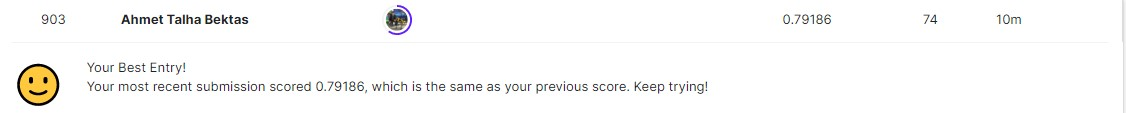